<table style="width:100%;">
    <tr>
        <td style="width:80%; text-align:left; vertical-align: center;">
            <img src="./Header/ETH_Logo.svg" alt="ETH logo" align="left" vspace="4">
        </td>
        <td style="width:20%; text-align:left; vertical-align: top;">
            Biochemical Engineering Lab<br/>
            Prof. Dr. P. Arosio<br/>
            <img src="./Header/DCHAB_Logo.png" alt="DCHAB logo" align="left" vspace="-50"
             style="width:150px; margin: -12px 0px 0px -20px;">
        </td>
    </tr>
</table>

<center> 
    <h1>Biochemical and Polymer Reaction Engineering: Exercise 4</h1>
    <h3>by Eduard Meier</h3>
</center>

<center> 
<img src="./Header/Header.jpg" alt="Polymers" style="width: 800px;"/>
</center>

This Jupyter Notebooks contains a presentation of the applied equations, all code (main script and various functions) used to solve the exercise as well as the resulting plots. It belongs to the course "Biochemical and Polymer Reaction Engineering", held by Prof. Arosio in the autumn semester 2022. References to equations inside the lecture script are indicated on the left side of the corresponding equations and refer to the equation number in the lecture script.

# 1 Equations and Derivations

## 1.1 Part a)

In a batch reactor, the mass balance of the substrate $S$ reads
 
\begin{equation}
    (\mathrm{Ch.} 7.6) \;\;\;\;\;\; V \frac{\mathrm{d}[S]}{\mathrm{d}t} = -r_S V
\end{equation}

with the reaction rate $r_S$ and volume $V$. Thus, the evolution of concentration (and also conversion) of species $S$ is solely determined by the reaction rate, which is governed by Michaelis-Menten kinetics:

\begin{equation}
    (\mathrm{Ex}) \;\;\;\;\;\; \frac{\mathrm{d}[S]}{\mathrm{d}t} = - \frac{V_\mathrm{max}[S]}{K_m + [S]} 
\end{equation}

The above ODE is thus numerically solved with the initial condition $[S](t=0) = [S]_0$.

## 1.2 Part b)

In a series of continuous stirred tank reactor (CSTR), the steady-state mass balance of the substrate $S$ for CSTR $i$ reads

\begin{equation}
    (\mathrm{Ch.} 7.6) \;\;\;\;\;\; \frac{\mathrm{d}[S]_i}{\mathrm{d}t} = \frac{1}{\tau_i} \left( [S]_{i,\mathrm{in}} - [S]_i \right) - \frac{V_\mathrm{max}[S]_i}{K_m + [S]_i} = 0
\end{equation}

Due to the assumption of steady-state, the system of coupled ODEs reduces to a system of algebraic equations. However, in this case, rearranging for yields a quadratic equation for $[S]$

\begin{equation}
    -[S]_i^2 + \left( [S]_{i,\mathrm{in}} - K_m - \tau_i V_\mathrm{max} \right) [S] + K_m [S]_{i,\mathrm{in}} = 0
\end{equation}

The solution of which reads:

\begin{equation}
    [S]_i = \frac{\left( [S]_{i,\mathrm{in}} - K_m - \tau_i V_\mathrm{max} \right) \mp \sqrt{\left( [S]_{i,\mathrm{in}} - K_m - \tau_i V_\mathrm{max} \right)^2+4 K_m [S]_{i,\mathrm{in}}}}{2}
\end{equation}

Iteratively applying this equation starting from the first CSTR yields the solution to the given problem.

## 1.3 Part c)

Similarly to the previous task, the steady-state mass balance for the substrate $S$ in the $i$th CSTR can be written as

\begin{equation}
    \frac{\mathrm{d}[S]_i}{\mathrm{d}t} = \frac{1}{\tau_i} \left( [S]_{i-1} - [S]_i \right) - \frac{V_\mathrm{max}[S]_i}{K_m + [S]_i} = 0  \; .
\end{equation}

Rearranging for the residence time times the maximal reaction rate yields

\begin{equation}
    \tau_i V_{\mathrm{max}} = \left( [S]_{i-1} - [S]_i \right) \frac{K_m + [S]_i}{[S]_i} \; .
\end{equation}

Dividing by the initial substrate concentration $[S]_0$ gives

\begin{equation}
    \frac{\tau_i V_{\mathrm{max}}}{[S]_0} = \left( [S]_{i-1} - [S]_i \right) \frac{K_m + [S]_i}{[S]_i [S]_0}  \; .
\end{equation}


When introducing the dimensionless substrate concentration $\alpha_i = S_i/S_0$, the dimensionless residence time in the $i$th CSTR $\theta_i = (\tau_i V_{\mathrm{max}})/S_0$ and the ratio $\kappa = K_m/S_0$ into the above equation and slight rearranging leads to

\begin{equation}
    \theta_i = \frac{(\alpha_{i-1}-\alpha_i)(\kappa + \alpha_i)}{\alpha_i}
\end{equation}

To find the intermediate $\theta_i$ values which correspond to the minimum total residence time, the following equation has to be solved:

\begin{equation}
    \frac{\mathrm{d}\sum_{j=1}^N \theta_j}{\mathrm{d} \alpha_i} = 0, \;\;\;\;\; i = 1, 2, ..., N-1
\end{equation}

Considering the derived relation for $\theta_i$, only two terms in the whole sum contain $\alpha_i$ (i.e. $\theta_i$ and $\theta_{i+1}$), which leads to the following derivative:

\begin{equation}
    \frac{\mathrm{d}}{\mathrm{d}\alpha_i} \left[ \frac{(\alpha_{i-1}-\alpha_i)(\kappa + \alpha_i)}{\alpha_i} + \frac{(\alpha_i - \alpha_{i-1})(\kappa+\alpha_{i+1})}{\alpha_{i+1}} \right] = 0
\end{equation}

By calculation of the derivative, one can easily find the expression

\begin{equation}
    \alpha_i^2 = \alpha_{i-1} \alpha_{i+1}, \;\;\;\;\; i = 1, 2, ..., N-1
\end{equation}

which can be further rearranged by expliciting the terms for each reactor and using a bottom up approach to:

\begin{equation}
    (\mathrm{Ex}) \;\;\;\;\;\; \alpha_i = \alpha_{i+1}^{i/(i+1)}, \;\;\;\;\; i = 1, 2, ..., N-1
\end{equation}

## 1.4 Part d)

Given the desired substrate conversion of 80 %, the dimensionless substrate concentrations can be calculated using a top-down approach with the equation 

\begin{equation}
    (\mathrm{Ex}) \;\;\;\;\;\; \alpha_i = \alpha_{i+1}^{i/(i+1)}, \;\;\;\;\; i = 1, 2, ..., N-1
\end{equation}

which can be rewritten in terms of conversion ($X_i = 1-\alpha_i$):

\begin{equation}
    (\mathrm{Ex}) \;\;\;\;\;\; 1-X_i = (1-X_{i+1})^{i/(i+1)}, \;\;\;\;\; i = 1, 2, ..., N-1
\end{equation}

# 2. Plots and Discussion

## Part a)

<figure> 
    <center>
    <img src="./Plots/Plot_BPRE_Ex4_1.png" alt="MM_Batch"  style="width: 800px;"/>
    <figcaption> Figure 1: Evolution of the substrate concentration and conversion of an enzymatic reaction featuring Michaelis-Menten kinetics in a batch reactor. </figcaption>
    </center>
</figure>

The time evolution of the substrate concentration in a batch reactor is only incluenced by the reaction rate and the chosen initial conditions. Integration of the Michaelis-Menten ODE yielded the diagrams displayed above.
As can be seen in the evolution of the substance concentration over time, at high concentration the decrease happens at a constant rate and is linear, while at low concentrations and conversions higher than 70%, the decline in concentration significantly slows down, since the probability of binding events between an enzyme and the substrate is much lower. The reaction time required to reach a conversion of 80% was calculated to be 5.80 hours.

## Part b)

<figure> 
    <center>
    <img src="./Plots/Plot_BPRE_Ex4_2.png" alt="CSTR"  style="width: 800px;"/>
    <figcaption> Figure 2: Evolution of the substrate concentration and conversion of an enzymatic reation featuring Michaelis-Menten kinetics in a series of 3 CSTRs.</figcaption>
    </center>
</figure>

Figure 2 shows the evolution of the substrate concentration with time in a cascade of 3 CSTRs. The assumption of instantaneous perfect mixing leads to discontinuities at the transitions between the reactors. In this case, each CSTR has the same residence time, given by reaction time for 80% conversion found in the batch case divided by the number of CSTRs employed. The substrate conversions were determined to be 27.87%, 54.22% and 77.15% relative to the initial feed concentration.

Comparison of the 80% conversion achieved in the batch model with the total conversion after the third CSTR (77.15%) shows, that the sequence of CSTRs is slightly less productive considering the same total reaction time of 5.80 h. The lower conversion results for example in a higher separation duty required downstream to the reactors, since less of the substrate has been converted to product. However, a continuous process can still be advantageous for a large scale implementation since it can be more easily automated and furthermore by optimizing the residence times in the three CSTRs, the achieved conversion can be further increased, which will be considered in the subsequent tasks.

## Part c)

The derivation of the equation

\begin{equation}
    \alpha_i^2 = \alpha_{i-1} \alpha_{i+1}, \;\;\;\;\; i = 1, 2, ..., N-1
\end{equation}

can be found in the section 1.3 above.

## Part d)

<figure> 
    <center>
    <img src="./Plots/Plot_BPRE_Ex4_4.png" alt="CSTR2"  style="width: 800px;"/>
    <figcaption> Figure 3: Evolution of the substrate concentration and conversion of an enzymatic reation featuring Michaelis-Menten kinetics in a series of 3 CSTRs with optimized residence times.</figcaption>
    </center>
</figure>

Based on the equation mentioned and derived above, the conversions after all CSTR reactors were calculated to be 41.52%, 65.80% and 80% (specified), which are displayed above in Figure 3. In addition, residence times of 2.94 h, 1.87 h and 1.24 h were calculated for the same three CSTR reactors in series. Consequently, a total time of 6.06 h is required to achieve a conversion of 80%, thus the higher achieved conversion (3.7% higher) is accompanied by a higher required reaction time (4.5% higher). However, in practice, the slight increase in reaction time is more than overcompensated by the decrease in downstream separation cost and the increase in profit due to the higher production volume.

In addition, the same method was generalized to an arbitrary number of CSTRs, and as can be seen below, the increase in number of CSTRs employed further reduces the required reaction time. While a cascade of 8 CSTRs features a required reaction time of 5.88 h to achieve a conversion of 80%, a cascade of 100 CSTRs in series comes extremely close to the reaction time of the batch case with 5.80 h. Thus, the limit of the CSTR cascade reaction time converges to the batch case.

<figure> 
    <center>
    <img src="./Plots/Plot_BPRE_Ex4_4_Supplementary.png" alt="CSTR3"  style="width: 800px;"/>
    <figcaption> Figure 4: Evolution of the substrate concentration and conversion of an enzymatic reation featuring Michaelis-Menten kinetics in a series of 8 CSTRs.</figcaption>
    </center>
</figure>

<figure> 
    <center>
    <img src="./Plots/Plot_BPRE_Ex4_4_Supplementary2.png" alt="CSTR4"  style="width: 800px;"/>
    <figcaption> Figure 5: Evolution of the substrate concentration and conversion of an enzymatic reation featuring Michaelis-Menten kinetics in a series of 100 CSTRs.</figcaption>
    </center>
</figure>

# Python Code

Import of the relevant libraries.

In [1]:
# Import libraries and other preliminaries

import numpy as np                    # Import numerical python library
import matplotlib as mpl              # Import python mathematical plotting library
import matplotlib.pyplot as plt       # Import python mathematical plotting library
from scipy.integrate import solve_ivp # Import solver for (system of coupled) ODEs

# Use LaTeX font in plots:
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computern Modern Roman'],
})

## Part a)

In [2]:
def ode_Batch(t, y, V_max, K_m):
    c_S = y
    dS_dt = - V_max * c_S / (K_m + c_S)
    return dS_dt

In [3]:
def solve_ode(Param, IsBatch):
    """
    Solve the Michaelis-Menten ODE in a Batch system
    """

    if IsBatch:
    
        # Read-out parameters and initial conditions
        tMin = Param[0]
        tMax = Param[1]
        tStep = Param[2]
        V_max = Param[3]
        K_m = Param[4]
        c_S0 = Param[5]

        # Define initial condition vector
        y0 = [c_S0]
        
        # Define time limits
        tlimits = [tMin, tMax]
        trange = np.arange(tMin, tMax+tStep, tStep)

        # Define additional ODE parameters
        Param_ODE = [V_max, K_m]

        # Solve system of ODEs (use Runge-Kutta 4-5th order for numerical integration)
        Sol= solve_ivp(ode_Batch, tlimits, y0, args=Param_ODE, method='RK45', t_eval=trange)
        t = Sol.t
        c_S = Sol.y[0]
        
        # Calculate conversion
        X_S = (c_S0 - c_S) / c_S0

    return c_S, X_S, t    

In [4]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

In [5]:
def TaskA():
    """
    Solve and plot the Michaelis-Menten ODE for a batch system
    """
    # Define parameters
    V_max = 4.45e-3     # Maximal reaction speed [mol/m^3/s]
    K_m = 8             # Michaelis-Menten constant [mol/m^3]
    
    # Define time steps and limits for ODE integration
    tMin = 0            # Start time [s]
    tMax = 20*3600      # Maximal time [s]
    tStep = 1           # Time step size [s]
    
    # Define initial condition
    c_S0 = 100.0        # Initial substrate conc. [mol/m^3]

    # Parameter array
    Param = [tMin, tMax, tStep, V_max, K_m, c_S0]
    
    # Create and solve system of ODEs
    c_S, X_S, t = solve_ode(Param, IsBatch=1)
    
    # Find time needed for 80% substrate conversion
    global X_ideal        # To use ideal conversion in other tasks of assignment
    X_ideal = 0.8
    idx_real, X_real = find_nearest(X_S, X_ideal)
    global t_real         # To use time in other tasks of assignment
    t_real = t[idx_real]
    print('The time to reach a conversion of {:.2f} % is {:.1f} h.'.format(X_real*1e2, t_real/3600))
        
    # Plot figure
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (12,5)) # Create figure with one plot
    
    plot1 = axs[0].plot(t/3600, c_S, color='black')      # Create plot of c_S [mol/m^3] vs. t [h]
    axs[0].set_xlabel('Time, $t$ [h]')   # Add x-axis label to plot
    axs[0].set_ylabel(r'Substrate Concentration, $[S]$ [mol m$^{-3}$]')  # Add y-axis label to plot

    plot2 = axs[1].plot(t/3600, X_S*1e2, color='black')      # Create plot of c_S [mol/m^3] vs. t [h]
    axs[1].set_xlabel('Time, $t$ [h]')   # Add x-axis label to plot
    axs[1].set_ylabel(r'Substrate Conversion, $X_S$ [$\%$]')  # Add y-axis label to plot

    # Title
    fig.suptitle('Michaelis-Menten Kinetics in a Batch Reactor', fontsize=16, y=0.98)   # Set overall title
        
    # Save plot
    filename = './Plots/Plot_BPRE_Ex4_1'
    plt.savefig(filename+'.png', bbox_inches='tight')      

The time to reach a conversion of 80.00 % is 5.8 h.


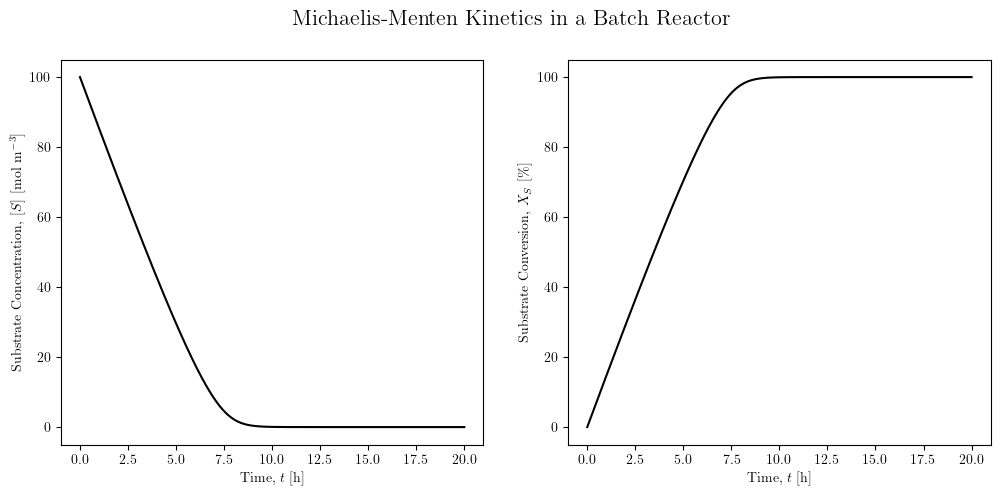

In [6]:
# Execute task a)
TaskA()

## Part b)

In [7]:
def cS(c_Sin, K_m, tau, V_max):
    c_S_minus = ((c_Sin - K_m - tau*V_max) - np.sqrt((c_Sin-K_m-tau*V_max)**2 + 4*K_m*c_Sin))/2
    c_S_plus = ((c_Sin - K_m - tau*V_max) + np.sqrt((c_Sin-K_m-tau*V_max)**2 + 4*K_m*c_Sin))/2
    
    if c_S_minus >= 0:
        return c_S_minus
    else: 
        return c_S_plus

In [8]:
def TaskB():
    """
    Solve and plot the Michaelis-Menten ODE for a series of 3 CSTRs -> not generalized for N CSTRs!
    """
    # Define parameters
    V_max = 4.45e-3     # Maximal reaction speed [mol/m^3/s]
    K_m = 8             # Michaelis-Menten constant [mol/m^3]

    # Import time until conversion of 80% is reached in batch
    global t_real         # To use time in other tasks of assignment
    
    # Define time steps and limits 
    tMin = 0            # Start time [s]
    tMax = t_real       # Maximal time [s]
    tStep = 0.1           # Time step size [s]
    
    # Create array of times and substrate concentrations
    trange = np.arange(tMin, tMax+tStep, tStep)
    c_S = np.zeros(len(trange))
    
    # Define initial condition
    c_S0 = 100.0        # Initial substrate conc. [mol/m^3]
    c_Sin1 = c_S0       # Conc. at inlet of first CSTR

    # Calculate residence time in each CSTR (total of 3 CSTRS)
    N_CSTR = 3
    tau = t_real/N_CSTR 
    
    # Iteratively calculate CSTR concentrations
    c_Sout1 = cS(c_Sin1, K_m, tau, V_max)
    c_Sin2 = c_Sout1
    
    c_Sout2 = cS(c_Sin2, K_m, tau, V_max)
    c_Sin3 = c_Sout2
    
    c_Sout3 = cS(c_Sin3, K_m, tau, V_max)

    # Assign the concentrations to the correct values in the c_S array
    for timeidx, time in enumerate(trange):
        
        if time <= tau:
            c_S[timeidx] = c_Sout1
            
        elif time <= 2*tau:
            c_S[timeidx] = c_Sout2
            
        else:
            c_S[timeidx] = c_Sout3     

    # Calculate conversion
    X_S = (c_S0 - c_S)/c_S0
    
    # Print the conversions in the three reactors and total time
    print('The conversions in the three CSTRs are: ', np.unique(X_S)*1e2, '%')
    print('This requires a total time of {:.2f}'.format(t_real/3600), 'h')
        
    # Plot figure
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (12,5)) # Create figure with one plot
    
    plot1 = axs[0].plot(trange/3600, c_S, color='black')      # Create plot of c_S [mol/m^3] vs. t [h]
    axs[0].set_xlabel('Time, $t$ [h]')   # Add x-axis label to plot
    axs[0].set_ylabel(r'Substrate Concentration, $[S]$ [mol m$^{-3}$]')  # Add y-axis label to plot

    plot2 = axs[1].plot(trange/3600, X_S*1e2, color='black')      # Create plot of c_S [mol/m^3] vs. t [h]
    axs[1].set_xlabel('Time, $t$ [h]')   # Add x-axis label to plot
    axs[1].set_ylabel(r'Substrate Conversion, $X_S$ [$\%$]')  # Add y-axis label to plot

    # Title
    fig.suptitle('Michaelis-Menten Kinetics in a Series of 3 CSTRs', fontsize=16, y=0.98)   # Set overall title
        
    # Save plot
    filename = './Plots/Plot_BPRE_Ex4_2'
    plt.savefig(filename+'.png', bbox_inches='tight') 


The conversions in the three CSTRs are:  [27.8691747  54.22355428 77.15406887] %
This requires a total time of 5.80 h


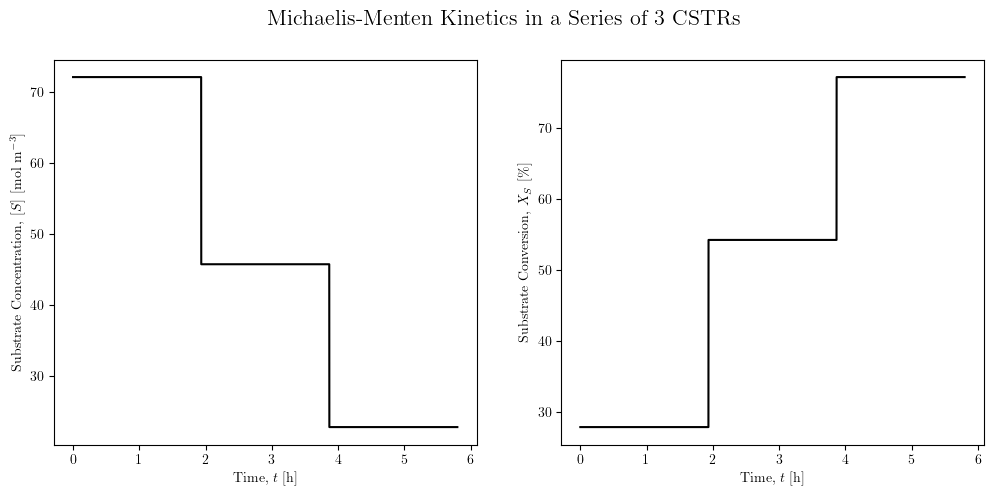

In [9]:
# Execute task b)
TaskB()

## Part d)

In [10]:
def thetai(alpha, kappa):
    theta = np.zeros(len(alpha))
    for i in range(1, len(alpha)):
        theta[i] = (alpha[i-1]-alpha[i]) * (kappa+alpha[i]) / alpha[i]
    return theta

In [11]:
def taui(theta, V_max, c_S0):
    return theta*c_S0/V_max

In [12]:
def TaskD(N_CSTR):
    """
    Solve and plot the Michaelis-Menten ODE for a series of N CSTRs -> generalized version
    with optimized residence time distributions
    """
    # Define parameters
    V_max = 4.45e-3     # Maximal reaction speed [mol/m^3/s]
    K_m = 8             # Michaelis-Menten constant [mol/m^3]
    
    # Define initial condition
    c_S0 = 100.0        # Initial substrate conc. [mol/m^3]
    c_Sin1 = c_S0       # Conc. at inlet of first CSTR

    # Define number of CSTRs in series
    if N_CSTR == 3:
        filename = './Plots/Plot_BPRE_Ex4_4'
    elif N_CSTR == 8:
        filename = './Plots/Plot_BPRE_Ex4_4_Supplementary'
    else:
        filename = './Plots/Plot_BPRE_Ex4_4_Supplementary2'

    # Calculate kappa
    kappa = K_m / c_S0
    
    # Calculate conversion for last CSTR
    X_S = np.zeros(N_CSTR+1)
    X_S[N_CSTR] = X_ideal
        
    # Iteratively calculate previous CSTR conversions (count down in for loop)
    for i in range(N_CSTR-1, 0, -1):
        X_S[i] = 1 - (1-X_S[i+1])**(i/(i+1))
        
    # Ignore first element of X_S, which was required since python starts indexing at 0
    print('Ignore first element of the following arrays, which was required since python starts indexing at 0')
    print('The conversions in the CSTRs are: ', X_S*1e2, '%')
        
    # Calculate alpha from conversion
    alpha = 1 - X_S
    
    # Calculate theta from alpha
    theta = thetai(alpha, kappa)
    
    # Calculate corresponding residence times in the CSTRs
    tau = taui(theta, V_max, c_S0)
    print('The residence times in the CSTRs are:', tau/3600, 'h')
    
    # Calculate total time
    t_total = np.sum(tau)
    print('This requires a total time of {:.2f}'.format(t_total/3600), 'h')
        
    # Define time steps and limits 
    tMin = 0            # Start time [s]
    tMax = t_total       # Maximal time [s]
    tStep = 1           # Time step size [s]
        
    # Create array of times and substrate concentrations
    trange = np.arange(tMin, int(tMax)+tStep, tStep)
    c_S = np.zeros(len(trange))
    
    # Assign conversions to array
    X_Srange = np.zeros(len(trange))
    
    for timeidx, time in enumerate(trange):
        
        N_Count = 0
                
        for tauidx, tauel in enumerate(tau):
            
            taucum = np.sum(tau[:tauidx+1])  
            
            #print(tauidx)
            #print(taucum/3600)
                
            if time <= taucum and N_Count == 0:
                                
                X_Srange[timeidx] = X_S[tauidx]
                
                N_Count += 1
                
                #print(time, tauidx, X_Srange)
           
        
    # Calculate concentrations from conversions
    c_S = np.zeros(len(trange))
    c_S = c_S0*(1-X_Srange)
        
    # Plot figure
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (12,5)) # Create figure with one plot
    
    plot1 = axs[0].plot(trange/3600, c_S, color='black')      # Create plot of c_S [mol/m^3] vs. t [h]
    axs[0].set_xlabel('Time, $t$ [h]')   # Add x-axis label to plot
    axs[0].set_ylabel(r'Substrate Concentration, $[S]$ [mol m$^{-3}$]')  # Add y-axis label to plot
    axs[0].set_xlim([0, t_total/3600])

    plot2 = axs[1].plot(trange/3600, X_Srange*1e2, color='black')      # Create plot of c_S [mol/m^3] vs. t [h]
    axs[1].set_xlabel('Time, $t$ [h]')   # Add x-axis label to plot
    axs[1].set_ylabel(r'Substrate Conversion, $X_S$ [$\%$]')  # Add y-axis label to plot
    axs[1].set_xlim([0, t_total/3600])
    
    # Title
    fig.suptitle('Michaelis-Menten Kinetics in a Series of {:.0f} CSTRs'.format(N_CSTR), fontsize=16, y=0.98)   # Set overall title
        
    # Save plot
    plt.savefig(filename+'.png', bbox_inches='tight')

Ignore first element of the following arrays, which was required since python starts indexing at 0
The conversions in the CSTRs are:  [ 0.         41.51964524 65.80048107 80.        ] %
The residence times in the CSTRs are: [0.         2.94628295 1.87020246 1.24090677] h
This requires a total time of 6.06 h


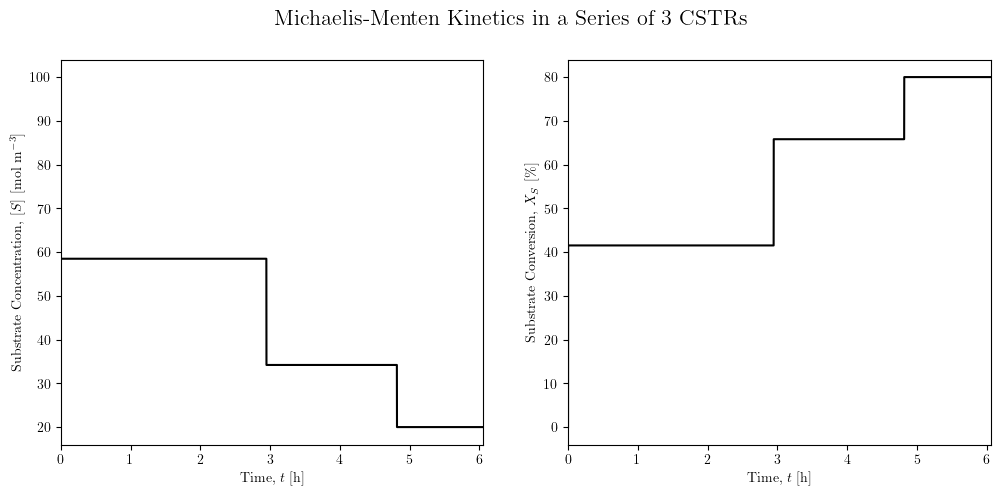

In [13]:
# Execute task d)
TaskD(N_CSTR = 3)

Ignore first element of the following arrays, which was required since python starts indexing at 0
The conversions in the CSTRs are:  [ 0.         18.2234566  33.1259695  45.31272943 55.27864045 63.428418
 70.09302438 75.5431091  80.        ] %
The residence times in the CSTRs are: [0.         1.24882728 1.04152742 0.87200476 0.73337499 0.62000836
 0.52730104 0.45148821 0.38949109] h
This requires a total time of 5.88 h


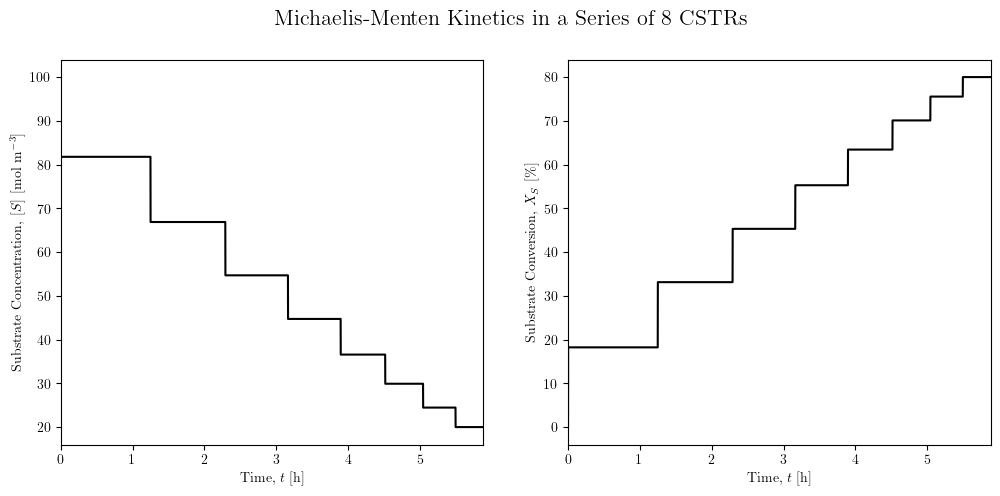

In [14]:
# Execute task d)
TaskD(N_CSTR = 8)

Ignore first element of the following arrays, which was required since python starts indexing at 0
The conversions in the CSTRs are:  [ 0.          1.59655566  3.16762143  4.71360425  6.2349046   7.73191654
  9.20502785 10.65462012 12.08106885 13.48474352 14.86600775 16.22521932
 17.56273033 18.87888723 20.17403095 21.44849698 22.70261545 23.93671122
 25.15110396 26.34610825 27.52203363 28.67918471 29.81786123 30.93835814
 32.04096569 33.1259695  34.19365062 35.24428562 36.27814665 37.29550151
 38.29661373 39.28174264 40.25114341 41.20506717 42.143761   43.06746806
 43.97642762 44.87087514 45.7510423  46.61715711 47.46944391 48.30812348
 49.13341306 49.94552644 50.74467397 51.53106267 52.30489623 53.06637511
 53.81569656 54.55305467 55.27864045 55.99264185 56.69524382 57.38662836
 58.06697455 58.73645865 59.39525405 60.04353142 60.68145869 61.30920108
 61.92692123 62.53477912 63.13293223 63.72153549 64.30074137 64.8706999
 65.43155873 65.98346314 66.52655608 67.06097825 67.58686807 68.

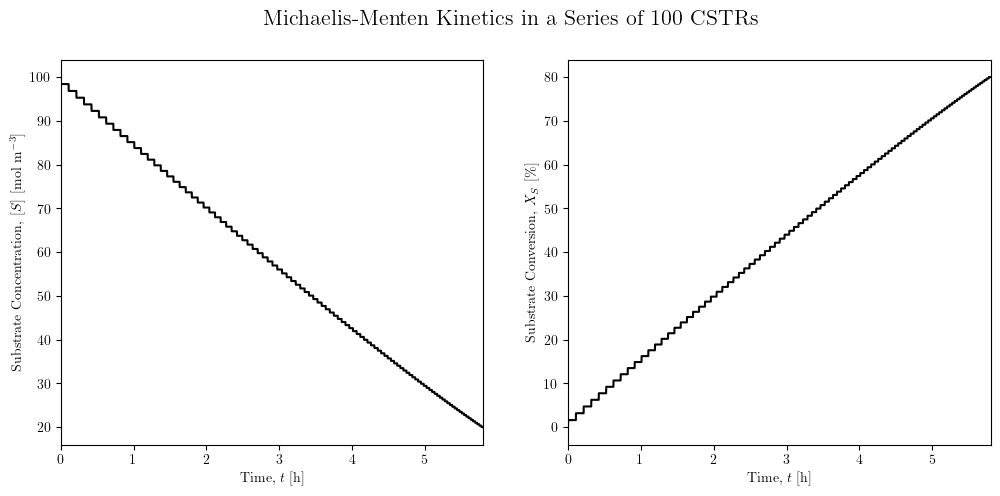

In [15]:
# Execute task d)
TaskD(N_CSTR = 100)